In [1]:
#Correlation and EDA with python

In [3]:
# import libraries

import pandas as pd
import seaborn as sns
import pingouin as pg
import matplotlib
import matplotlib.pyplot as plt

import numpy as np 

from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

sns.set_style('ticks')
#Read the data

df = pd.read_csv("E:\DA\Project 6\movies.csv")


In [4]:
#Looking at the data
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [5]:
# Dataset information

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    5497 non-null   float64
 12  gross     7479 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB


In [6]:
# Checking the dataset for missing/ null values
df.isnull().sum()

name           0
rating        77
genre          0
year           0
released       2
score          3
votes          3
director       0
writer         3
star           1
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64

In [7]:
# Dropping the rows with null or missing values
df = df.dropna()

In [8]:
#  Rechecking the dataset for null or missing values
df.isnull().sum()

name        0
rating      0
genre       0
year        0
released    0
score       0
votes       0
director    0
writer      0
star        0
country     0
budget      0
gross       0
company     0
runtime     0
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5421 entries, 0 to 7652
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      5421 non-null   object 
 1   rating    5421 non-null   object 
 2   genre     5421 non-null   object 
 3   year      5421 non-null   int64  
 4   released  5421 non-null   object 
 5   score     5421 non-null   float64
 6   votes     5421 non-null   float64
 7   director  5421 non-null   object 
 8   writer    5421 non-null   object 
 9   star      5421 non-null   object 
 10  country   5421 non-null   object 
 11  budget    5421 non-null   float64
 12  gross     5421 non-null   float64
 13  company   5421 non-null   object 
 14  runtime   5421 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 677.6+ KB


In [10]:
# Sorting the dataset according to gross
df.sort_values(by = ['gross'], inplace = False, ascending = False)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000.0,2.847246e+09,Twentieth Century Fox,162.0
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000.0,2.797501e+09,Marvel Studios,181.0
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000.0,2.201647e+09,Twentieth Century Fox,194.0
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000.0,2.069522e+09,Lucasfilm,138.0
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000.0,2.048360e+09,Marvel Studios,149.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5640,Tanner Hall,R,Drama,2009,"January 15, 2015 (Sweden)",5.8,3500.0,Francesca Gregorini,Tatiana von Fürstenberg,Rooney Mara,United States,3000000.0,5.073000e+03,Two Prong Lesson,96.0
2434,Philadelphia Experiment II,PG-13,Action,1993,"June 4, 1994 (South Korea)",4.5,1900.0,Stephen Cornwell,Wallace C. Bennett,Brad Johnson,United States,5000000.0,2.970000e+03,Trimark Pictures,97.0
3681,Ginger Snaps,Not Rated,Drama,2000,"May 11, 2001 (Canada)",6.8,43000.0,John Fawcett,Karen Walton,Emily Perkins,Canada,5000000.0,2.554000e+03,Copperheart Entertainment,108.0
272,Parasite,R,Horror,1982,"March 12, 1982 (United States)",3.9,2300.0,Charles Band,Alan J. Adler,Robert Glaudini,United States,800000.0,2.270000e+03,Embassy Pictures,85.0


In [11]:
# checking for duplicates
df.duplicated(keep=False).sum()

0

In [12]:
#EDA
df1 = df.copy()
# Top Genres

df1['genre'].unique()

# 15 unique genres

array(['Drama', 'Adventure', 'Action', 'Comedy', 'Horror', 'Biography',
       'Crime', 'Fantasy', 'Animation', 'Family', 'Western', 'Sci-Fi',
       'Romance', 'Thriller', 'Mystery'], dtype=object)

In [13]:
# No. of movies in each genre

df1['genre'].value_counts()

Comedy       1496
Action       1415
Drama         863
Crime         399
Adventure     327
Biography     311
Animation     277
Horror        251
Fantasy        41
Mystery        17
Thriller        7
Sci-Fi          6
Romance         5
Family          4
Western         2
Name: genre, dtype: int64

In [14]:
# Top 10 genres
df1['genre'].value_counts().nlargest(10)

Comedy       1496
Action       1415
Drama         863
Crime         399
Adventure     327
Biography     311
Animation     277
Horror        251
Fantasy        41
Mystery        17
Name: genre, dtype: int64

In [16]:
# Genre vs Movies Released

df_genre_plot = df1['genre'].value_counts().rename_axis('genre').reset_index(name='count')

df_genre_plot

,genre,count
0,Comedy,1496
1,Action,1415
2,Drama,863
3,Crime,399
4,Adventure,327
5,Biography,311
6,Animation,277
7,Horror,251
8,Fantasy,41
9,Mystery,17


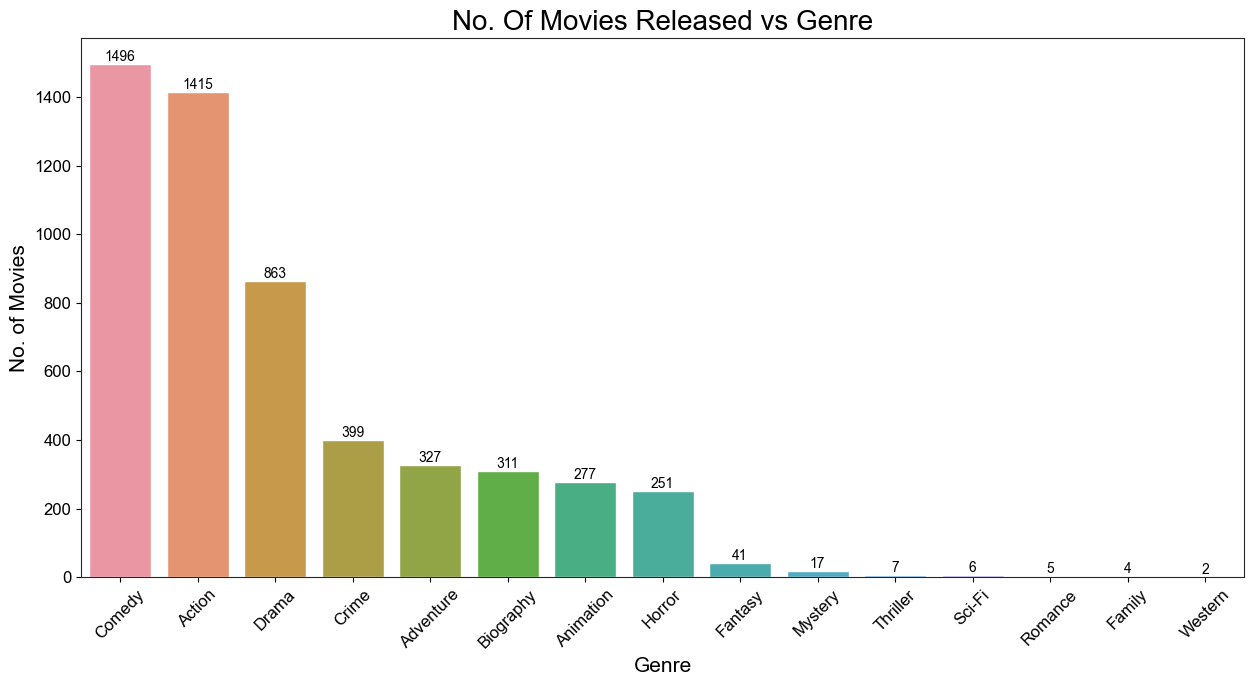

In [17]:
# Barplot
fig, ax = plt.subplots()
plt.gcf().set_size_inches(15, 7)

# Creating a barplot

ax = sns.barplot(x = 'genre', y = 'count', data = df_genre_plot)

# Set up the title
ax.set_title("No. Of Movies Released vs Genre", fontsize = 20, color = 'black')

#set x axis label
ax.set_xlabel("Genre", fontsize = 15, color = 'black')

#set y axis label
ax.set_ylabel('No. of Movies', fontsize = 15, color = 'black')

#set up tick and bar labels
ax.set_xticklabels(df_genre_plot['genre'], rotation = 45)
ax.bar_label(ax.containers[0], fontsize = 10, color = 'black',label_type='edge')

# changing tick parameters
ax.tick_params(axis='both', labelsize = 12, colors='black')

plt.show()

In [10]:
# Company
df2 = df.copy()

In [11]:
# No. of movies released by each company

df_company_count = df2['company'].value_counts()
df_company_count = df_company_count.rename_axis('company').reset_index(name = 'no_movies_released')
df_company_count

,company,no_movies_released
0,Universal Pictures,330
1,Columbia Pictures,302
2,Warner Bros.,298
3,Paramount Pictures,279
4,Twentieth Century Fox,209
...,...,...
1470,Cinépix Film Properties (CFP),1
1471,Intermedia Films,1
1472,Dollface,1
1473,Calimari Productions,1


In [12]:
# Total Gross earned by companies
df2.groupby('company')['gross'].sum()

company
"DIA" Productions GmbH & Co. KG         44350926.0
"Weathering With You" Film Partners    193457467.0
.406 Production                            10580.0
1492 Pictures                          217256250.0
1818 Productions                        12232628.0
                                          ...     
erbp                                      587174.0
i am OTHER                              17986781.0
i5 Films                                10031529.0
micro_scope                              7099598.0
thefyzz                                 62198461.0
Name: gross, Length: 1475, dtype: float64

In [13]:
df_company_gross = df2.groupby('company')['gross'].sum().reset_index()
df_company_gross

,company,gross
0,"""DIA"" Productions GmbH & Co. KG",44350926.0
1,"""Weathering With You"" Film Partners",193457467.0
2,.406 Production,10580.0
3,1492 Pictures,217256250.0
4,1818 Productions,12232628.0
...,...,...
1470,erbp,587174.0
1471,i am OTHER,17986781.0
1472,i5 Films,10031529.0
1473,micro_scope,7099598.0


In [14]:
# Joining df_company_gross and df_company_count to form df_company df
df_company = df_company_count.merge(df_company_gross, on = 'company', how = 'inner')
df_company['gross'] = df_company['gross'].astype('int64')
df_company

,company,no_movies_released,gross
0,Universal Pictures,330,51241105418
1,Columbia Pictures,302,42356430218
2,Warner Bros.,298,54610959970
3,Paramount Pictures,279,40021704691
4,Twentieth Century Fox,209,39542573303
...,...,...,...
1470,Cinépix Film Properties (CFP),1,2375097
1471,Intermedia Films,1,11841544
1472,Dollface,1,16757163
1473,Calimari Productions,1,11203026


In [15]:
df_company.sort_values(by = ['gross', 'no_movies_released'], ascending = False)


,company,no_movies_released,gross
2,Warner Bros.,298,54610959970
0,Universal Pictures,330,51241105418
1,Columbia Pictures,302,42356430218
3,Paramount Pictures,279,40021704691
4,Twentieth Century Fox,209,39542573303
...,...,...,...
1333,.406 Production,1,10580
858,Enderby Entertainment,1,8315
812,Two Prong Lesson,1,5073
1232,Copperheart Entertainment,1,2554


In [16]:
df_company.sort_values(by = ['gross','no_movies_released'], ascending = False).head(10)

,company,no_movies_released,gross
2,Warner Bros.,298,54610959970
0,Universal Pictures,330,51241105418
1,Columbia Pictures,302,42356430218
3,Paramount Pictures,279,40021704691
4,Twentieth Century Fox,209,39542573303
6,Walt Disney Pictures,107,35833650748
5,New Line Cinema,155,19612851164
43,Marvel Studios,12,15065592411
26,DreamWorks Animation,28,11873612858
9,Dreamworks Pictures,75,11593807697


In [17]:
# Top 10 Companies with highest Gross Earnings
top_10_company = df_company.sort_values(by = [ 'gross','no_movies_released'], ascending = False).head(10)
top_10_company

,company,no_movies_released,gross
2,Warner Bros.,298,54610959970
0,Universal Pictures,330,51241105418
1,Columbia Pictures,302,42356430218
3,Paramount Pictures,279,40021704691
4,Twentieth Century Fox,209,39542573303
6,Walt Disney Pictures,107,35833650748
5,New Line Cinema,155,19612851164
43,Marvel Studios,12,15065592411
26,DreamWorks Animation,28,11873612858
9,Dreamworks Pictures,75,11593807697


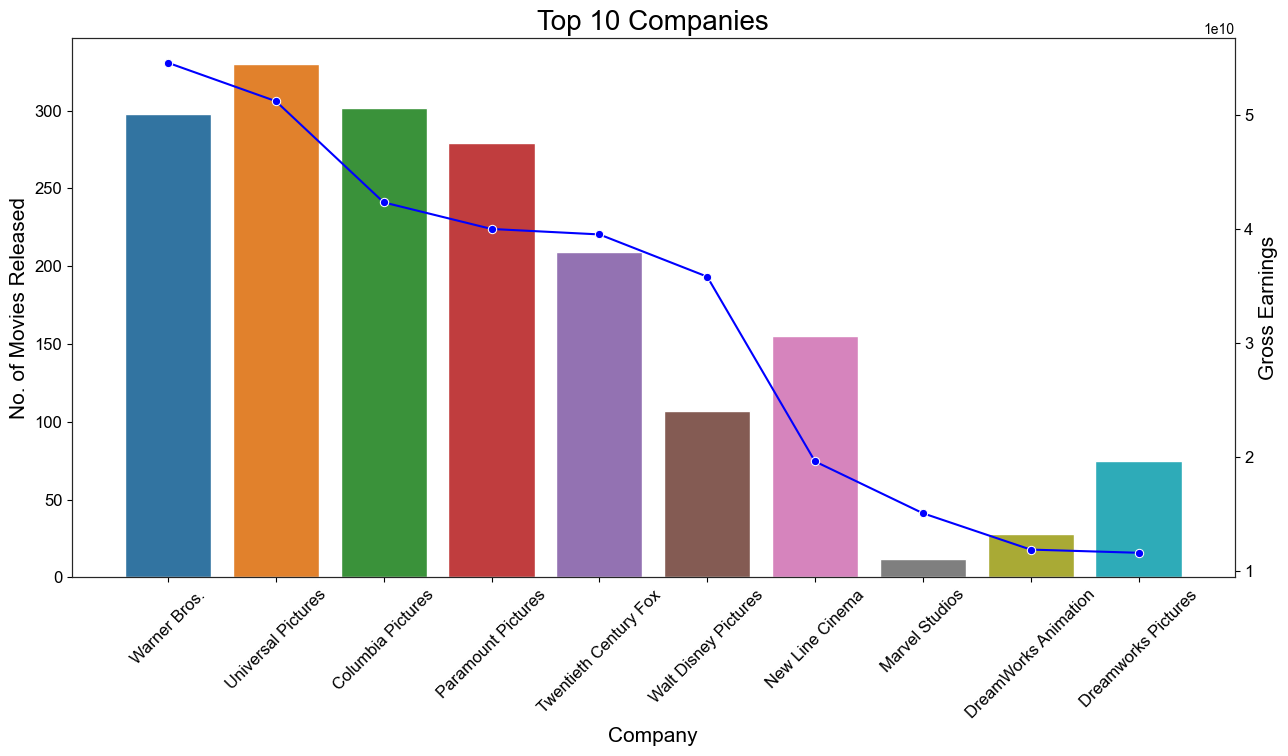

In [19]:
# Bar - Line Graph : Top Companies
#Subplots
fig1, ax1 = plt.subplots()
plt.gcf().set_size_inches(15, 7)

# create barplot
ax1 = sns.barplot(x= 'company', y = 'no_movies_released', data = top_10_company)

# Set up the title
ax1.set_title("Top 10 Companies", fontsize = 20, color = 'black')


# set x-axis label
ax1.set_xlabel("Company", fontsize = 15, color = 'black')

# set y-axis label
ax1.set_ylabel("No. of Movies Released", fontsize=15, color = 'black')

# twin object for two different y-axis on the sample plot
ax2=ax1.twinx()

# making plot with gross earnings as second axis object
ax2 = sns.lineplot(x = 'company', y = 'gross', data = top_10_company, color="blue", marker="o")

ax2.set_ylabel("Gross Earnings", color="black",fontsize=15)


ax1.set_xticklabels(top_10_company['company'], rotation = 45)

ax1.tick_params(axis='both', labelsize = 12, colors='black')
ax2.tick_params(axis='both', labelsize = 12, colors='black')
plt.show()

In [27]:
# Country
df_country = df['country'].value_counts().rename_axis('country').reset_index(name = 'no_movies_released')
df_country

,country,no_movies_released
0,United States,4319
1,United Kingdom,492
2,Canada,111
3,France,105
4,Germany,82
5,Australia,42
6,Japan,28
7,China,26
8,Hong Kong,24
9,Ireland,21


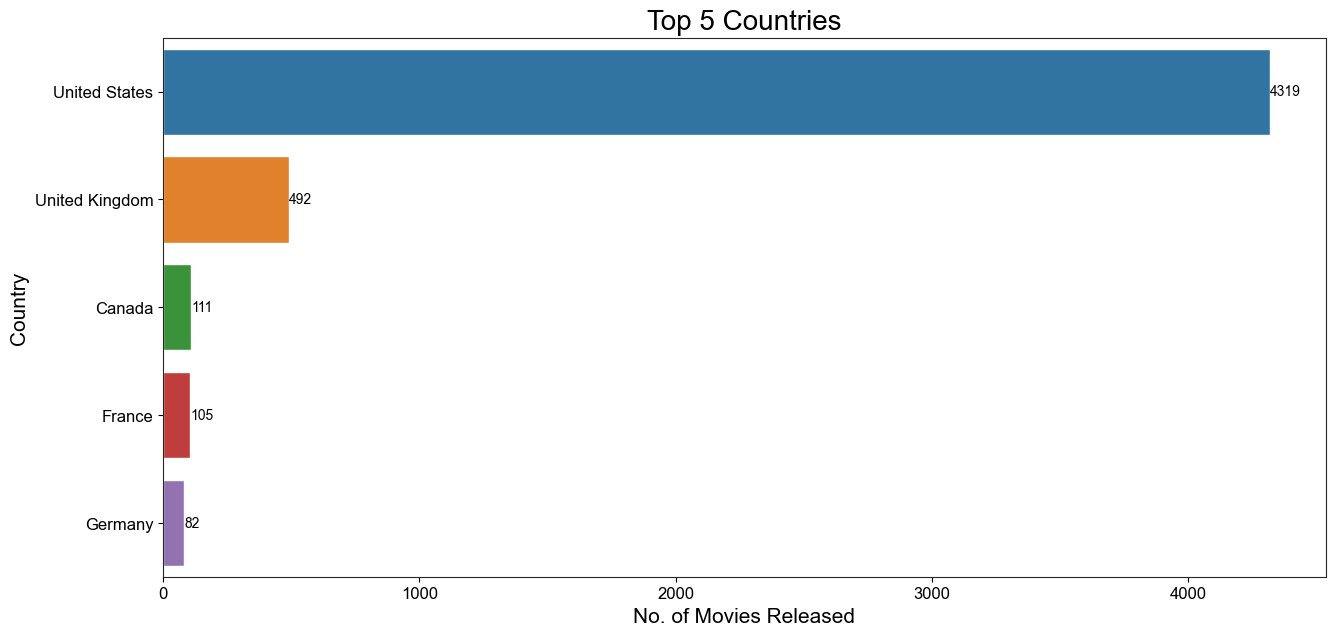

In [28]:
# Top 5 countries : Highest Number of movies released
top_5_country = df_country.head(5)

fig3, ax3 = plt.subplots()
plt.gcf().set_size_inches(15, 7)

ax3 = sns.barplot(y = 'country', x = 'no_movies_released', data = top_5_country)

# Set up title
ax3.set_title('Top 5 Countries',fontsize = 20, color = 'black')

# set x-axis label
ax3.set_xlabel("No. of Movies Released", fontsize = 15, color = 'black')

# set y-axis label
ax3.set_ylabel("Country", fontsize=15, color = 'black')

ax3.bar_label(ax3.containers[0], fontsize = 10, color = 'black')

ax3.tick_params(axis='both', labelsize = 12, colors='black')

plt.show()


In [29]:
# Years: movies released throughout the years
# Movies released throughout the 
df_year = df['year'].value_counts().rename_axis('year').reset_index(name = 'no_movies_released')
df_year = df_year.sort_values('year')
df_year

,year,no_movies_released
39,1980,40
38,1981,63
37,1982,71
36,1983,83
35,1984,88
34,1985,95
33,1986,99
32,1987,104
26,1988,130
28,1989,115


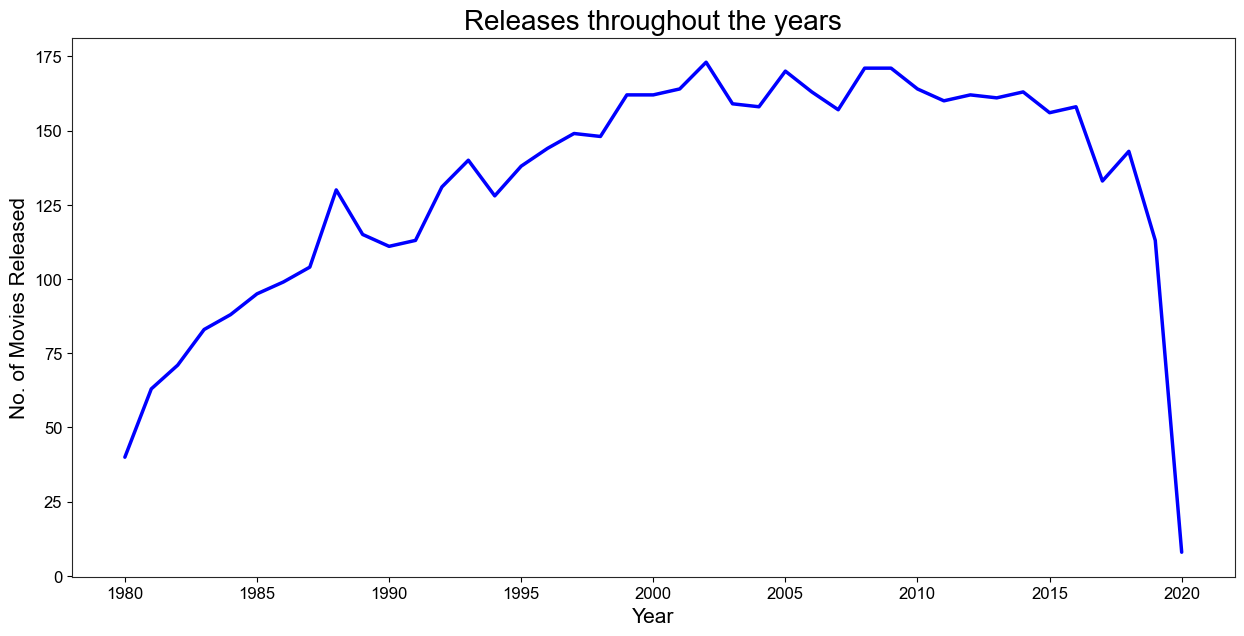

In [31]:
# Line Plot
ax4,fig4 = plt.subplots()
plt.gcf().set_size_inches(15, 7)
# Line Plot
ax4 = sns.lineplot(x = 'year', y = 'no_movies_released', data = df_year, color = 'blue', lw = 2.5)

# set title
ax4.set_title("Releases throughout the years", fontsize = 20, color = 'black')


# set x-axis label
ax4.set_xlabel("Year", fontsize = 15, color = 'black')

# set y-axis label
ax4.set_ylabel("No. of Movies Released", fontsize=15, color = 'black')


ax4.tick_params(axis='both', labelsize = 12, colors='black')

plt.show()

In [32]:
# Correlations

# Checking for correlation between gross and budget
df.corr( numeric_only = True)

,year,score,votes,budget,gross,runtime
year,1.000000,0.056386,0.206021,0.327722,0.274321,0.075077
score,0.056386,1.000000,0.474256,0.072001,0.222556,0.414068
votes,0.206021,0.474256,1.000000,0.439675,0.614751,0.352303
budget,0.327722,0.072001,0.439675,1.000000,0.740247,0.318695
gross,0.274321,0.222556,0.614751,0.740247,1.000000,0.275796
runtime,0.075077,0.414068,0.352303,0.318695,0.275796,1.000000


In [33]:
df['votes'].corr(df['gross'])

0.6147512368504806

In [34]:
# correlation between gross and budget and gross and votes
df['budget'].corr(df['gross'])

0.7402465439219628

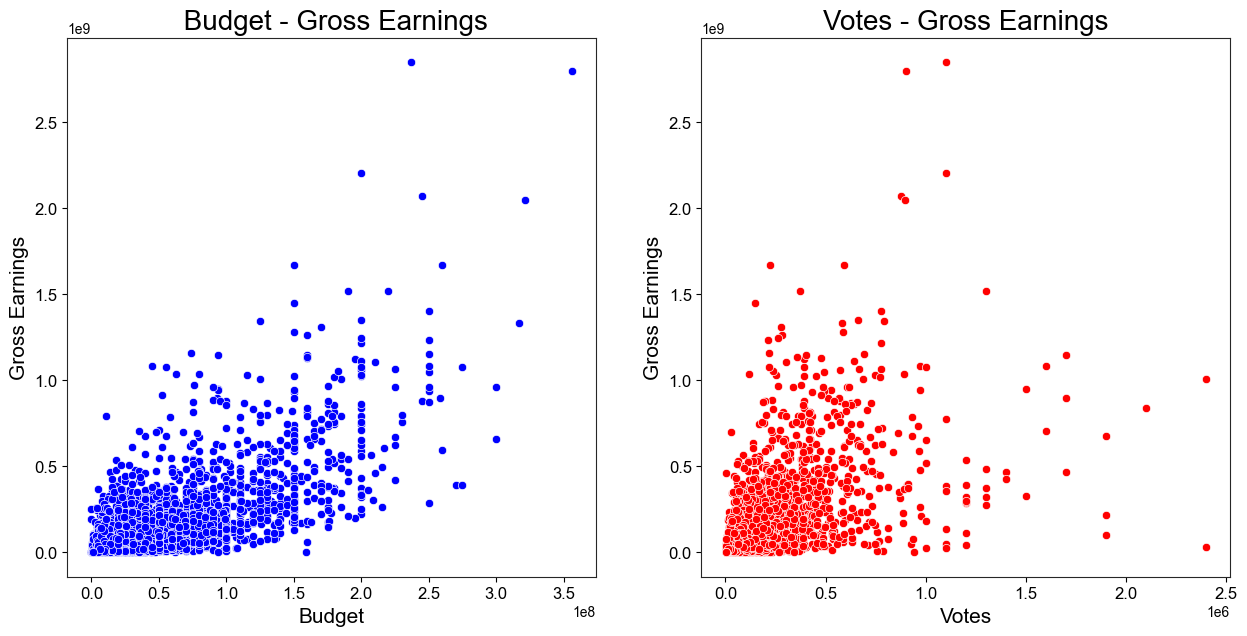

In [35]:
#Budget and Gross
# Scatter plot: Gross vs Budget
fig5, ax = plt.subplots(1, 2)
plt.gcf().set_size_inches(15, 7)

# creating a scatter plot
ax5 = sns.scatterplot(x = 'budget', y = 'gross', data = df, color = 'blue', ax = ax[0])

# set title
ax5.set_title(" Budget - Gross Earnings", fontsize = 20, color = 'black')

# set x-axis label
ax5.set_xlabel("Budget", fontsize = 15, color = 'black')

# set y-axis label
ax5.set_ylabel("Gross Earnings", fontsize=15, color = 'black')

#votess
# Creating scatter plot 
ax6 = sns.scatterplot(x = 'votes', y = 'gross',data = df, color ='red', ax = ax[1])

# Set up title
ax6.set_title('Votes - Gross Earnings', color ='black', fontsize = 20)

# set x-axis label
ax6.set_xlabel("Votes", fontsize = 15, color = 'black')

# set y-axis label
ax6.set_ylabel("Gross Earnings", fontsize=15, color = 'black')

# Changing the tick parameters
ax5.tick_params(axis = 'both', labelsize = 12, colors = 'black')
ax6.tick_params(axis='both', labelsize = 12, colors='black')

plt.show()

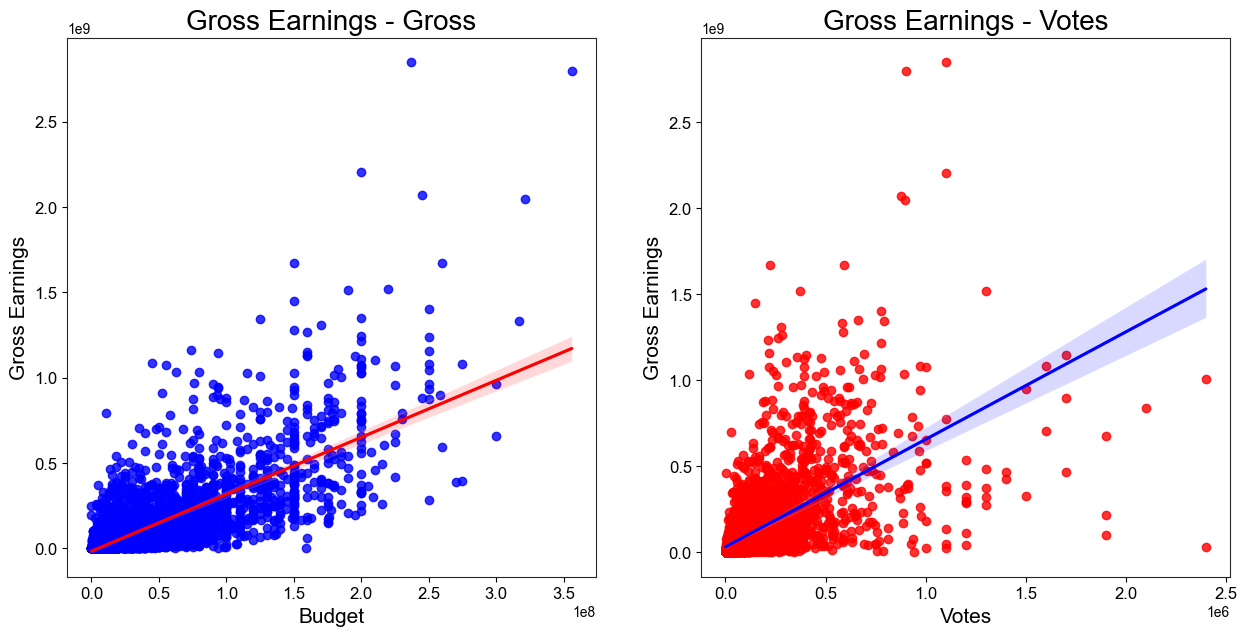

In [36]:
# Plot gross vs budget regplot

fig5, ax = plt.subplots(1,2)
plt.gcf().set_size_inches(15, 7)

# Creating a regplot
ax7 = sns.regplot(x = 'budget', y = 'gross', data = df, scatter_kws = {'color': 'blue'}, line_kws = {'color': 'red'}, ax = ax[0])

# set title
ax7.set_title("Gross Earnings - Gross", fontsize = 20, color = 'black')

# set x-axis label
ax7.set_xlabel("Budget", fontsize = 15, color = 'black')

# set y-axis label
ax7.set_ylabel("Gross Earnings", fontsize=15, color = 'black')


# Creating a regplot- votes
ax8 = sns.regplot(x = 'votes', y = 'gross', data = df, scatter_kws = {'color': 'red'}, line_kws = {'color': 'blue'}, ax = ax[1])

# set title
ax8.set_title("Gross Earnings - Votes", fontsize = 20, color = 'black')

# set x-axis label
ax8.set_xlabel("Votes", fontsize = 15, color = 'black')

# set y-axis label
ax8.set_ylabel("Gross Earnings", fontsize=15, color = 'black')

# Changing ticks parameters
ax7.tick_params(axis='both', labelsize = 12, colors='black')
ax8.tick_params(axis='both', labelsize = 12, colors='black')

plt.show()

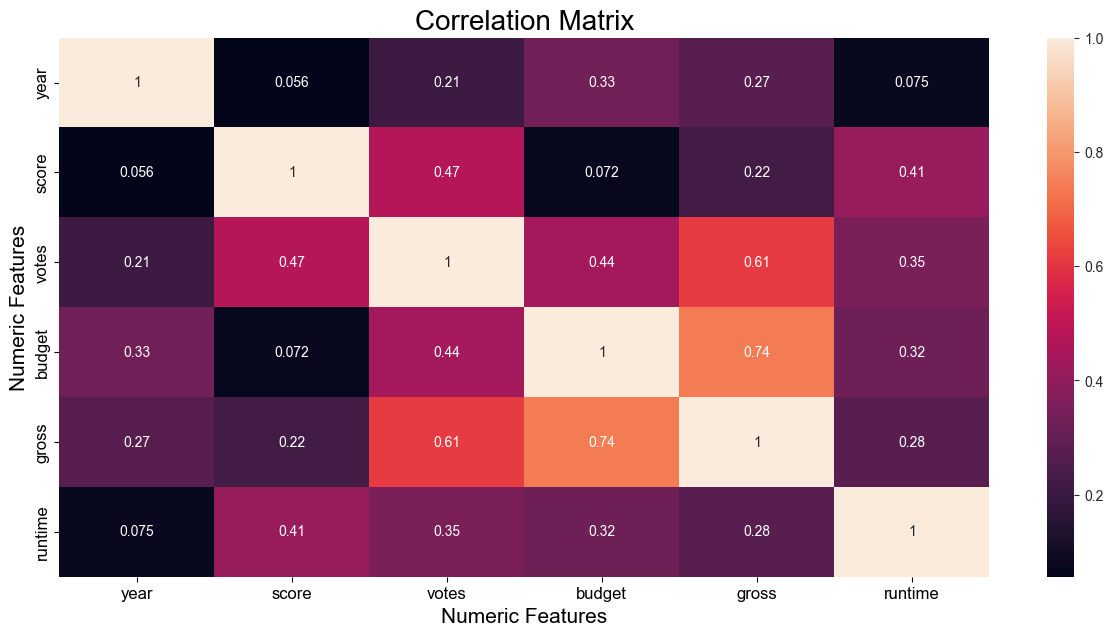

In [37]:
# High Correlation between budget and gross

correlation_matrix = df.corr(method = 'pearson', numeric_only = True)

ax9, fig6 = plt.subplots()
plt.gcf().set_size_inches(15, 7)

# creating a heatmap
ax9 = sns.heatmap(correlation_matrix, annot = True)

# set title
ax9.set_title("Correlation Matrix", fontsize = 20, color = 'black')

# set x-axis label
ax9.set_xlabel("Numeric Features", fontsize = 15, color = 'black')

# set y-axis label
ax9.set_ylabel("Numeric Features", fontsize=15, color = 'black')

# Changing tick parameters

ax9.tick_params(axis='both', labelsize = 12, colors='black')


plt.show()

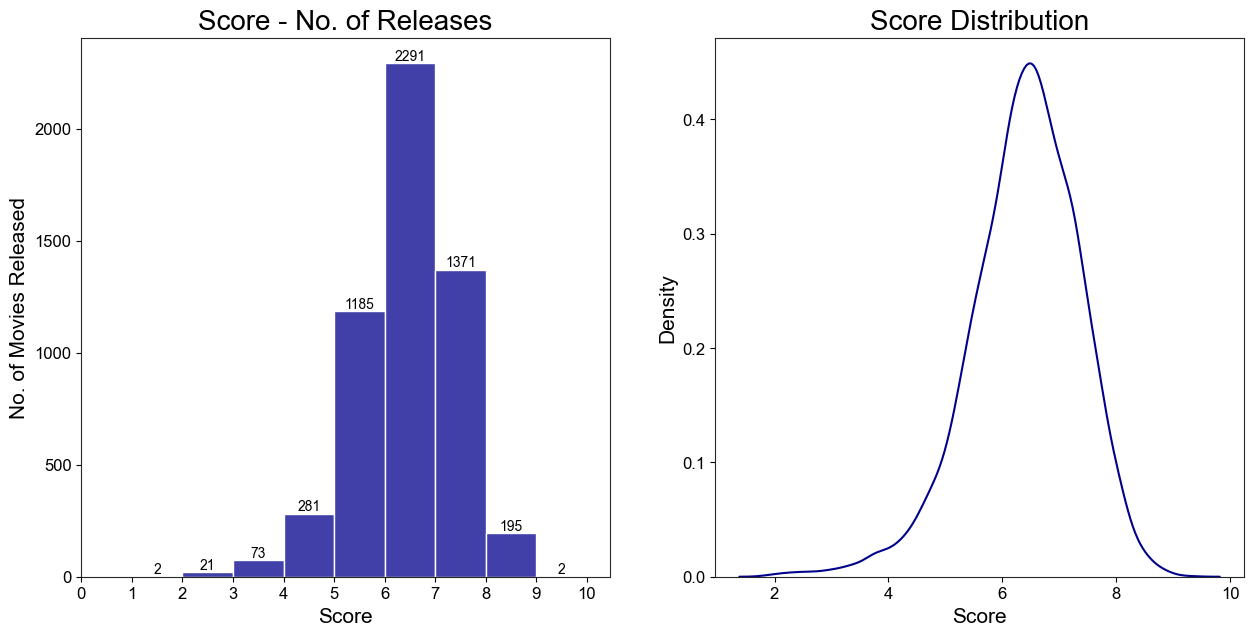

In [52]:
# Score Distribution

fig6,ax  = plt.subplots(1,2, figsize=(15,7))

# Creating a histogram

ax9 = sns.histplot(df['score'], color = 'darkblue', bins = [1,2,3,4,5,6,7,8,9,10], ax = ax[0])

# set title
ax9.set_title("Score - No. of Releases", fontsize = 20, color = 'black')

# set x-axis and y-axis label

ax9.set_xlabel("Score", fontsize = 15, color = 'black')
ax9.set_ylabel("No. of Movies Released", fontsize = 15, color = 'black')
ax9.set_xticks([0,1,2,3,4,5,6,7,8,9,10])

ax9.bar_label(ax9.containers[0], fontsize=10, color='black')

# Kdeplot

ax10 = sns.kdeplot(df['score'], color = 'darkblue', ax = ax[1])

# set title
ax10.set_title("Score Distribution", fontsize = 20, color = 'black')

# set x-axis and y-axis label

ax10.set_xlabel('Score', fontsize = 15, color = 'black')
ax10.set_ylabel('Density', fontsize = 15, color = 'black')

# changing tick parameters

ax9.tick_params(axis='both', labelsize = 12, colors='black')
ax10.tick_params(axis='both', labelsize = 12, colors='black')


plt.show()

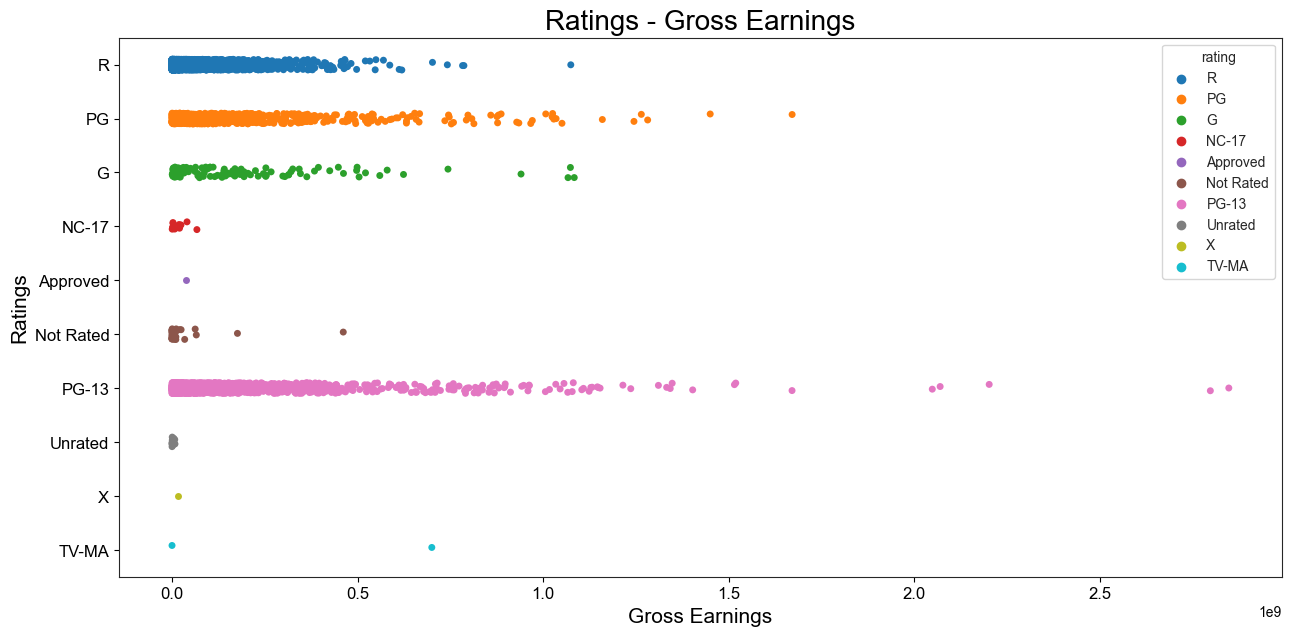

In [47]:
#Stripplot : Rating vs Gross
ax11,fig7 = plt.subplots()
plt.gcf().set_size_inches(15, 7)

# Creating a strip plot
ax11 = sns.stripplot(data=df, x="gross", y="rating", hue = "rating")

# set title
ax11.set_title("Ratings - Gross Earnings", fontsize = 20, color = 'black')

# set x-axis label
ax11.set_xlabel("Gross Earnings", fontsize = 15, color = 'black')

# set y-axis label
ax11.set_ylabel("Ratings", fontsize = 15, color = 'black')

# Changing tick parameters

ax11.tick_params(axis='both', labelsize = 12, colors='black')


plt.show()

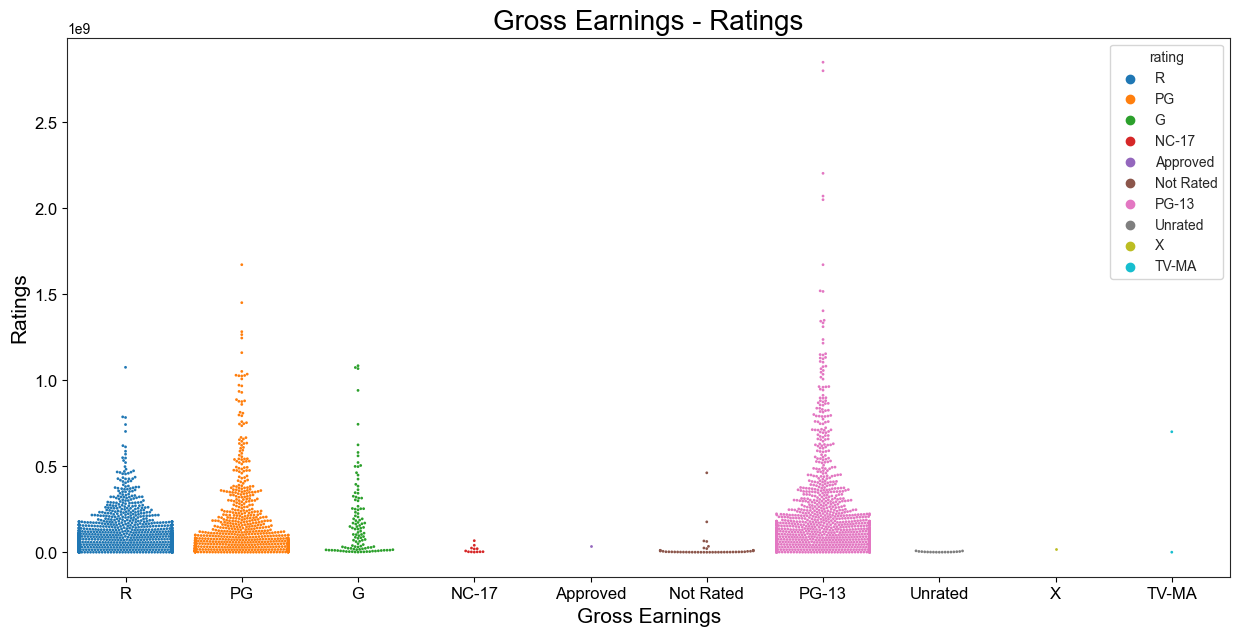

In [48]:
fig8, ax12 = plt.subplots()
plt.gcf().set_size_inches(15, 7)

ax12 = sns.swarmplot(x = 'rating', y = 'gross', hue = 'rating', data = df, size = 2)

# set title
ax12.set_title("Gross Earnings - Ratings", fontsize = 20, color = 'black')

# set x-axis label
ax12.set_xlabel("Gross Earnings", fontsize = 15, color = 'black')

# set y-axis label
ax12.set_ylabel("Ratings", fontsize=15, color = 'black')

# Changing tick parameters

ax12.tick_params(axis='both', labelsize = 12, colors='black')


plt.show()

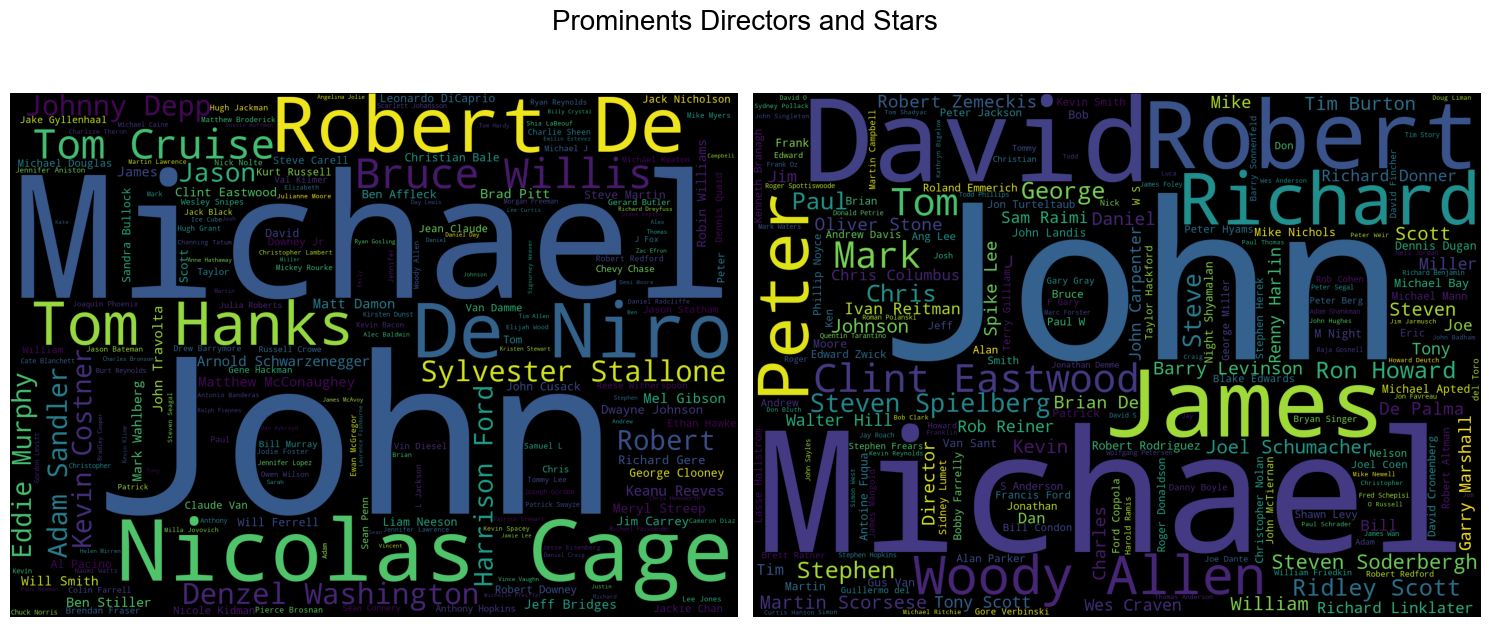

In [63]:
from wordcloud import WordCloud
# Prominent Stars and Directors in the dataset
fig9, (ax13, ax14 )= plt.subplots(1, 2, figsize=(15,7))

# Stars
wordcloud = WordCloud(
                          background_color='Black', width = 1500, 
                          height = 1080,
                         ).generate(" ".join(df['star']))
ax13.imshow(wordcloud)

# Directors
wordcloud2 = WordCloud(
                          background_color='black', width = 1500,
                          height = 1080,
                         ).generate(" ".join(df['director']))

ax14.imshow(wordcloud2)


ax13.axis('off')

ax14.axis('off')

fig9.tight_layout()
fig9.suptitle("Prominents Directors and Stars", fontsize = 20, color = 'black')

fig9.subplots_adjust(top=0.95)

plt.show()